## Viewing pairwise associations between severity and feautures using only patients with complete data (no missing value imputation)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)
# this data file was created using the RF_no_nan_data.ipynb file which should be in the missing value imputation folder

In [3]:
data.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


In [4]:
data['Severity'].value_counts()

3    8778
2    5142
1    5036
0    2862
Name: Severity, dtype: int64

### Train Test Split


In [5]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']
X=data[features]  # Features  
y=data['Severity']  # Labels

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

### Random Forest Classifier

In [7]:
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45508707607699356


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.24      0.31       572
           1       0.33      0.30      0.32      1007
           2       0.27      0.12      0.17      1029
           3       0.53      0.81      0.64      1756

   micro avg       0.46      0.46      0.46      4364
   macro avg       0.39      0.37      0.36      4364
weighted avg       0.41      0.46      0.41      4364



### Feature importances

In [9]:
pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)

Age                                0.095169
BMI                                0.075706
Abdominal_perimeter                0.071652
Weight                             0.065850
Height                             0.061119
Cervical_perimeter                 0.060616
Pichots_scale                      0.059844
Epworth_scale                      0.059238
Systolic_BP                        0.053339
Depression_scale                   0.048628
Diastolic_BP                       0.047845
Respiratory_arrest                 0.015144
Nocturia                           0.014167
Nocturnal_perspiration             0.014002
Driving_drowsiness                 0.013496
Morning_headache                   0.013282
Shortness_of_breath_on_exertion    0.012816
Sex                                0.012578
High_BP                            0.012077
Former_smoker                      0.011943
Obesity                            0.011388
Current_smoker                     0.010818
Morning_fatigue                 

## Building a model to separate 2 vs 3

In [10]:
sev = [2,3]
data_2_3 = data[data['Severity'].isin(sev)]

In [11]:
data_2_3.shape

(13920, 51)

In [12]:
data_2_3['Severity'].value_counts()

3    8778
2    5142
Name: Severity, dtype: int64

#### Changing Severity 3 to 1 (for positive cases) and Severity 2 to 0 (for negative cases)

In [13]:
data_2_3["Severity"].replace({2:0, 3:1}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
data_2_3['Severity'].value_counts()

1    8778
0    5142
Name: Severity, dtype: int64

## Classifiers

In [15]:
X=data_2_3[features]  # Features  
y=data_2_3['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [16]:
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6652298850574713


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.32      0.41      1028
           1       0.69      0.87      0.77      1756

   micro avg       0.67      0.67      0.67      2784
   macro avg       0.64      0.59      0.59      2784
weighted avg       0.65      0.67      0.64      2784



In [18]:
pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)

Age                                0.089550
BMI                                0.082303
Abdominal_perimeter                0.077325
Cervical_perimeter                 0.069283
Weight                             0.068429
Height                             0.061255
Pichots_scale                      0.059392
Epworth_scale                      0.057878
Systolic_BP                        0.052073
Diastolic_BP                       0.048762
Depression_scale                   0.045006
Respiratory_arrest                 0.018149
Nocturia                           0.012391
Nocturnal_perspiration             0.012063
Sex                                0.011843
Driving_drowsiness                 0.011678
Morning_headache                   0.011515
Hypercholesterolemia               0.011346
Shortness_of_breath_on_exertion    0.011296
High_BP                            0.011098
Obesity                            0.010739
Former_smoker                      0.010561
Gastric_reflux                  

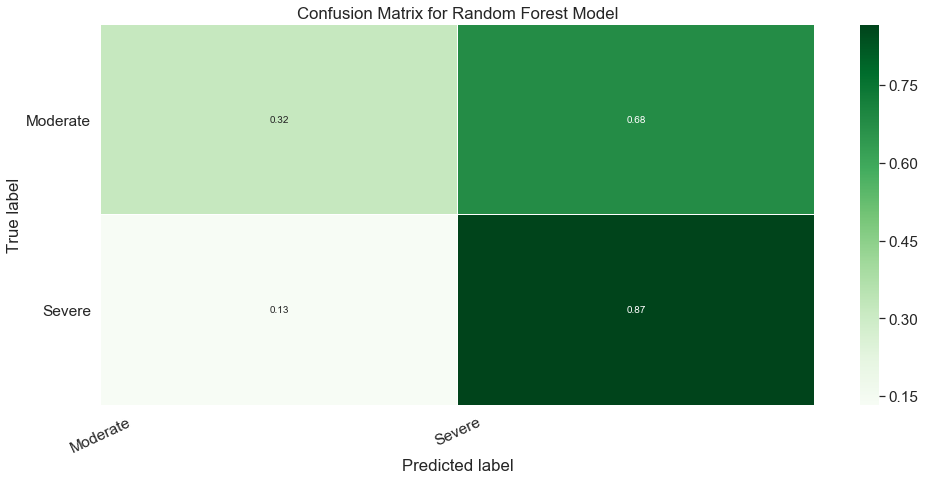

In [19]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Moderate', 'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

#### Limiting features to the most important ones

In [20]:
continuous = ['Age','Height','Weight','Cervical_perimeter','Abdominal_perimeter','Systolic_BP','Diastolic_BP', 
              'BMI','Epworth_scale','Pichots_scale','Depression_scale']
X=data_2_3[continuous]  # Features  
y=data_2_3['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [21]:
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6483477011494253


In [22]:
r_important2_3 = ['Sex', 'Age', 'Former_smoker','Weight', 'Cervical_perimeter',
                  'Abdominal_perimeter', 'Systolic_BP', 'BMI', 'High_BP',  
                  'Nocturia', 'Respiratory_arrest']
X=data_2_3[r_important2_3]  # Features  
y=data_2_3['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [23]:
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 0)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6479885057471264


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.34      0.42      1028
           1       0.68      0.83      0.75      1756

   micro avg       0.65      0.65      0.65      2784
   macro avg       0.61      0.59      0.58      2784
weighted avg       0.63      0.65      0.63      2784



#### Testing other classifiers

In [25]:
X=data_2_3[features]  # Features  
y=data_2_3['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)


In [26]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(class_weight='balanced', random_state = 0, solver = 'lbfgs', max_iter = 2000)

# Logistic Regression Cross-Validated
from sklearn.linear_model import LogisticRegressionCV
models['Logistic Regression CV'] = LogisticRegressionCV(class_weight='balanced', random_state = 0, cv = 5, max_iter = 2000)

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(class_weight='balanced', random_state = 0, max_iter = 2000)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(class_weight='balanced', random_state = 0)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(class_weight='balanced', random_state = 0, n_estimators = 100)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Ridge Classifier
from sklearn.linear_model import RidgeClassifier
models['Ridge Classifier']= RidgeClassifier(class_weight='balanced', random_state = 0)

# Ridge cross-validated classifier
from sklearn.linear_model import RidgeClassifierCV
models['Ridge Classifier CV']=RidgeClassifierCV( class_weight='balanced')   # this takes about 15 minutes to run

# Multilayer Perceptron
from sklearn.neural_network import MLPClassifier
models['MLP']=MLPClassifier(random_state=0, early_stopping=True)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)  # this is using data_2_3 X and y train/test
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.633621,0.627563,0.750681
Logistic Regression CV,0.627514,0.622437,0.745058
Support Vector Machines,0.645115,0.988610,0.642012
Decision Trees,0.567170,0.646355,0.660268
Random Forest,0.665230,0.867312,0.685419
Naive Bayes,0.602371,0.590547,0.727719
K-Nearest Neighbor,0.623922,0.757973,0.681516
Ridge Classifier,0.631106,0.621868,0.750515
Ridge Classifier CV,0.631466,0.621868,0.751032
MLP,0.665589,0.853645,0.689830


### Adjusting MLP to scaled X train and test data

In [29]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
 # Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  

In [30]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(random_state=0, early_stopping=True)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6533764367816092


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.31      0.40      1028
           1       0.68      0.85      0.76      1756

   micro avg       0.65      0.65      0.65      2784
   macro avg       0.62      0.58      0.58      2784
weighted avg       0.63      0.65      0.62      2784



In [32]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)